Modelos computacionais aplicados à dados biológicos - Aula 02 - 22/10/2025

In [76]:
#houseprices é um dataset com variáveis características de uma casa que influenciam o preco
#Install dependencies as needed:
!pip install kagglehub[pandas-datasets]

zsh:1: no matches found: kagglehub[pandas-datasets]


In [77]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [78]:
#Set the path to the file you would like to download
file_path = "train.csv"

#Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lespin/house-prices-dataset",
    file_path,
    #Provide any additional arguments like
    #sql_query or pandas_kwargs. See the
    #documentation for more information:
    #https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
#função load_dataset() com parametros 1 transformar em dataframe, qual dataset e qual file desse dataset

#função df.head() mostra as 5 primeiras linhas de um dataframe
print("First 5 records:", df.head())
#Também pode usar assim:
df.head() #mostra o cabeçalho do dataframe

/var/folders/68/w8w3f5fd73v0d9lzkxhv5vjh0000gn/T/ipykernel_78947/3569631143.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Vamos fazer um algoritmo para tentar descobrir o preço das casas com base nas características
SalePrice é a nossa variável resposta

In [79]:
df.describe()
#Essa função "descreve" o dataframe
#contagem, media, desvio padrão, min, quartis, percentis

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [80]:
df.info()
#mostra o tipo dos dados, inteiro, objetos (strings, dados categóricos), float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
df.tail() #mostra as 5 últimas linhas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [82]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #para criar graficos
import seaborn as sns #para criar mais graficos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #o que está depois do ponto é uma subdivisão dentro da biblioteca do sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [83]:
#Pré processamento dos dados
#Dropar variáveis que não servem
df = df.drop(columns=['Id','Alley','MasVnrType','MiscFeature','PoolQC','FireplaceQu','Fence'])
#Id não interfere no preço da casa pq é só uma identificação
#Alley, Fence etc tem muitas variáveis ausentes, como vimos em df.info

df.info()

#contar quantas variáveis são nulas
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

Substituir dados ausentes (.fillna) por mediana apenas nos dados numéricos (median(numeric_only=True))

In [84]:
#usar a mediana para preencher NAs
#argumento numeric_only é para fazer essa troca só em dados numerics
df.fillna(df.median(numeric_only=True), inplace=True) #inplace é para substituir no lugar do NaN
df.fillna('None', inplace=True) #essa é para dados que está em branco/vazios

In [85]:
#criar um novo dataframe com as colunas categóricas
col_cats = df.select_dtypes(include=['object']).columns
for col in col_cats:                                #para todas as colunas categóricas
    le = LabelEncoder()                             #codificar em números
    df[col] = le.fit_transform(df[col])

#OneHotEncoder transforma uma variável categórica numa variável binária, p.e. 
#estratégias tróficas com respostas A, H, M, se transformariam em 3 colunas com variáveis binárias

Separar dados de treinamento e teste

In [86]:
X = df.drop(columns=['SalePrice']) #tiramos SalePrice pq é a variável resposta, x são as variáveis preditoras
y = df['SalePrice']                #agora y é a variável resposta
#X são as variáveis preditoras

#Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#test_size 25% dos dados serão usados para teste
#random_state é tipo o set.seed do R

Modelo de Regressão Linear

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Treinamento/Validação

In [88]:
y_pred = model.predict(X_test)

Avaliar Desempenho/métricas

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE:{mse}")
print(f"R2: {r2}")

MAE: 21503.551898546197
MSE:1095293421.9028468
R2: 0.8436480940784348


Plotar

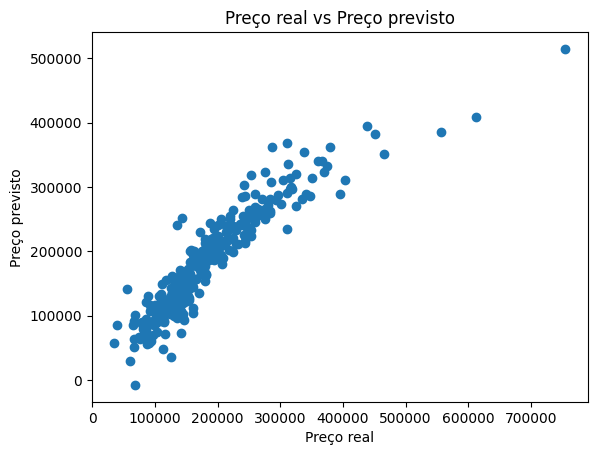

In [90]:
plt.scatter(y_test, y_pred)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs Preço previsto")
plt.show()

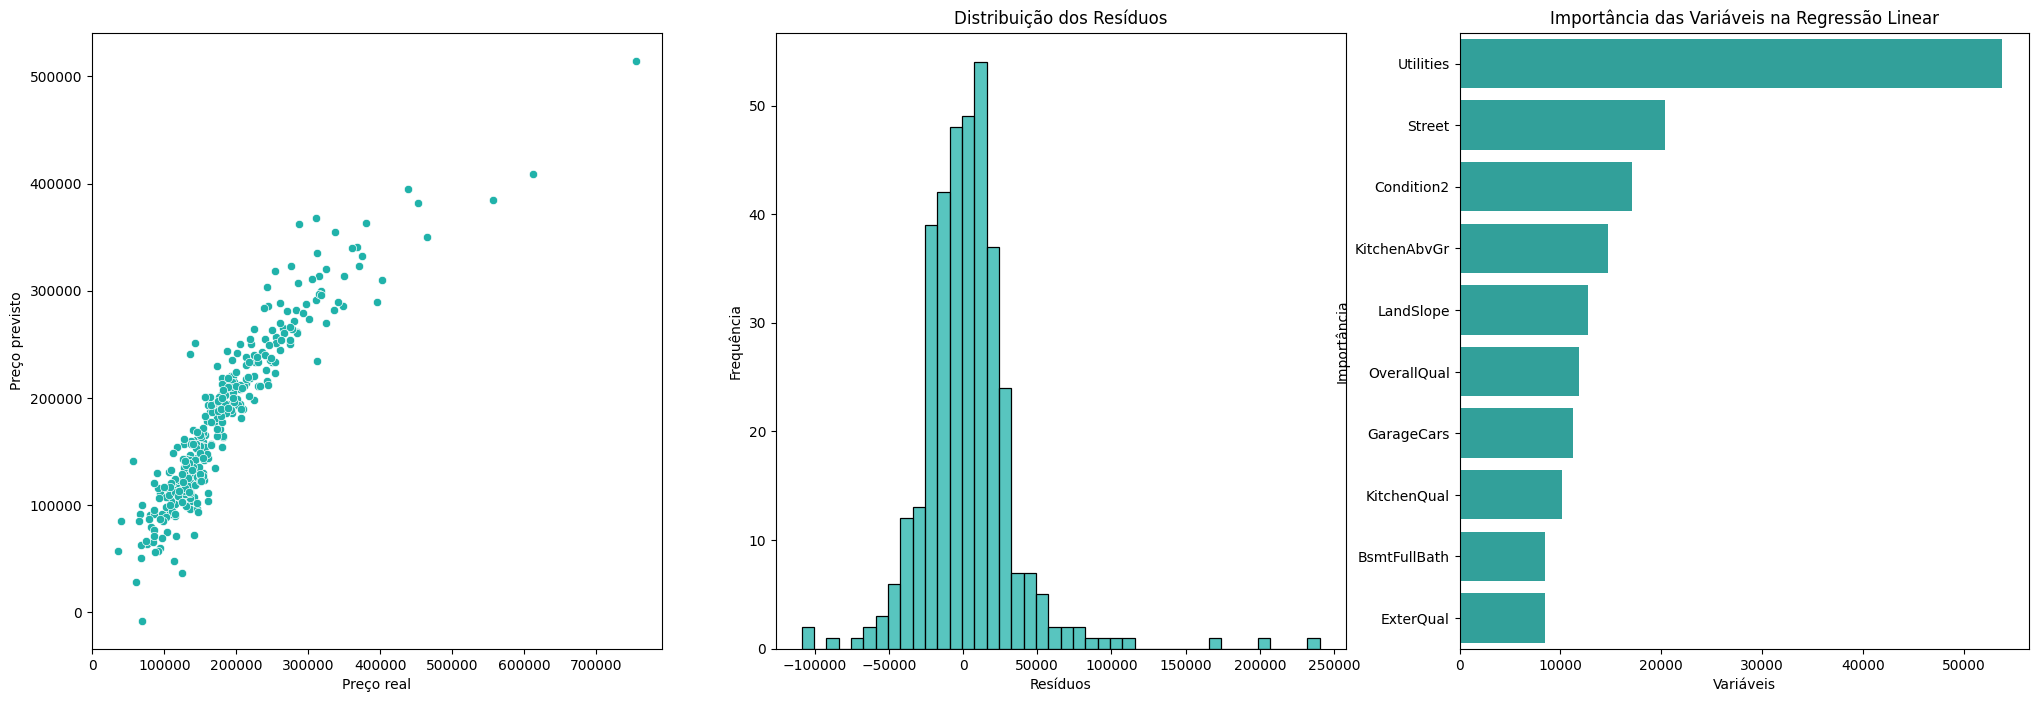

In [91]:
#Plotando SUBPLOTS
plt.figure(figsize=(25,8))

#Gráfico de dispersão
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")


#Gráfico de resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")

#Gráficos da importância das 10 variáveis mais importantes
plt.subplot(1, 3, 3)
importancia = model.coef_
variaveis = X.columns

coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importancia)})
top_10 = coef_df.nlargest(10, 'Importância')

sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.title("Importância das Variáveis na Regressão Linear")

plt.savefig("gráficos.tiff", dpi=600)
plt.show()


In [92]:
from sklearn.ensemble import RandomForestRegressor

MAE: 16745.508086168364
MSE:723299772.6873904
R2: 0.8967497697412999


Text(0.5, 1.0, 'Top 10 Variáveis Mais Importantes')

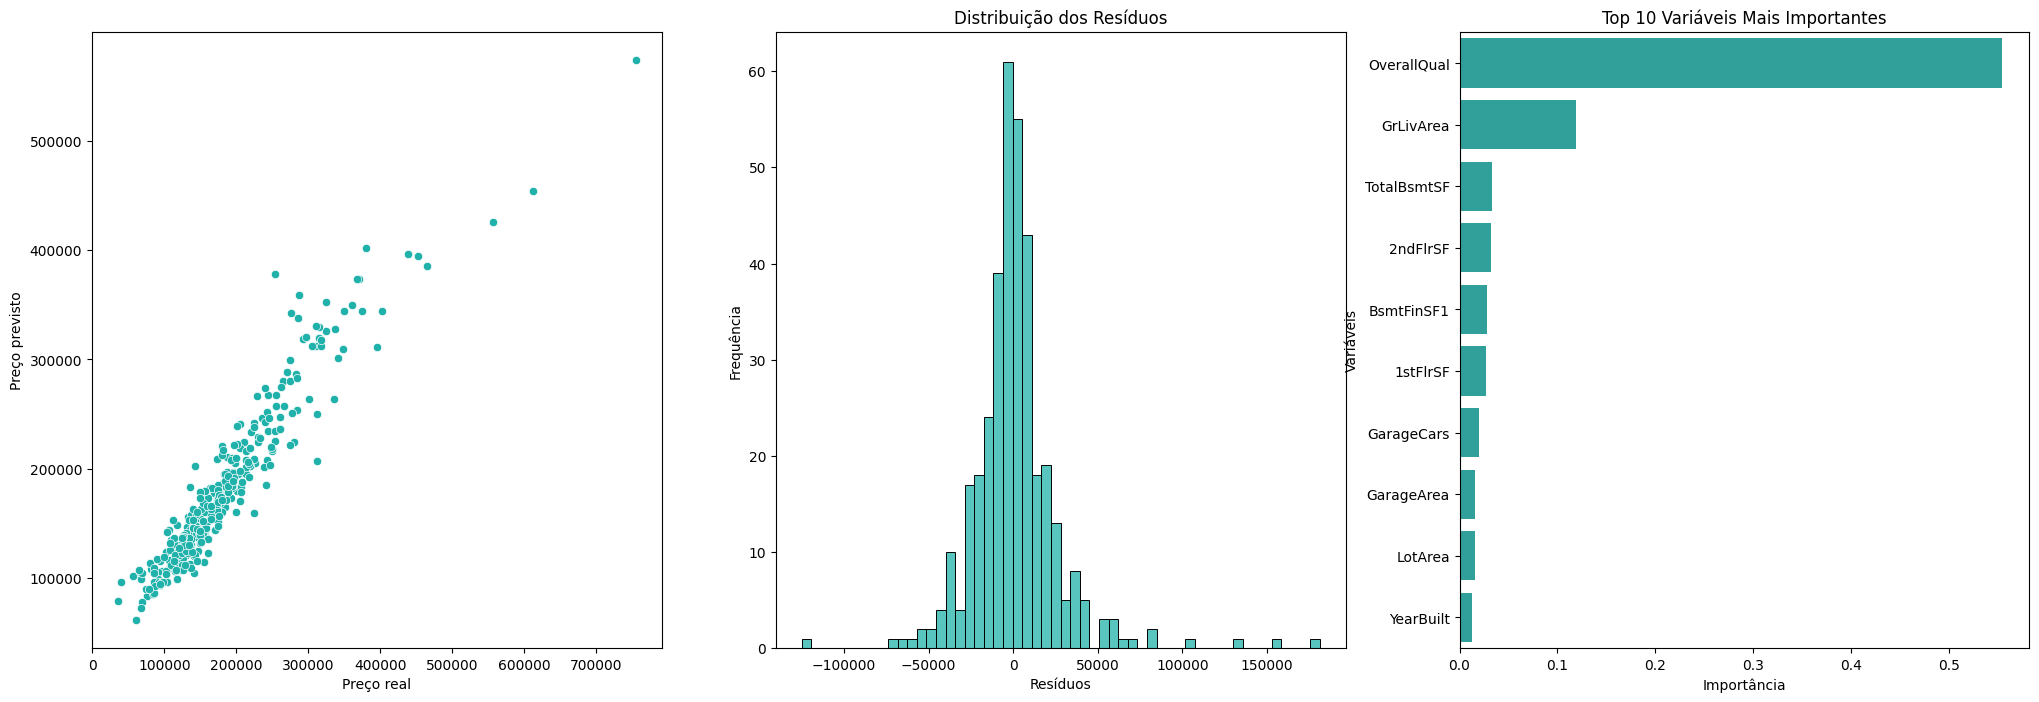

In [93]:
rf = RandomForestRegressor(n_estimators=999, random_state=42)
rf.fit(X_train, y_train) # treinando o modelo
y_pred = rf.predict(X_test) # fazendo previsões
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE:{mse}")
print(f"R2: {r2}")

#Plotando SUBPLOTS
plt.figure(figsize=(25,8))

#Gráfico de dispersão
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")

#Gráfico de resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")

#Gráficos da importância das 10 variáveis mais importantes
plt.subplot(1, 3, 3)
importances = rf.feature_importances_
variaveis = X.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importances)})
top_10 = coef_df.nlargest(10, 'Importância')
sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Top 10 Variáveis Mais Importantes")

In [94]:
!pip install xgboost


In [95]:
from xgboost import XGBRegressor

MAE: 18069.796875
MSE:774043648.0
R2: 0.8895061016082764


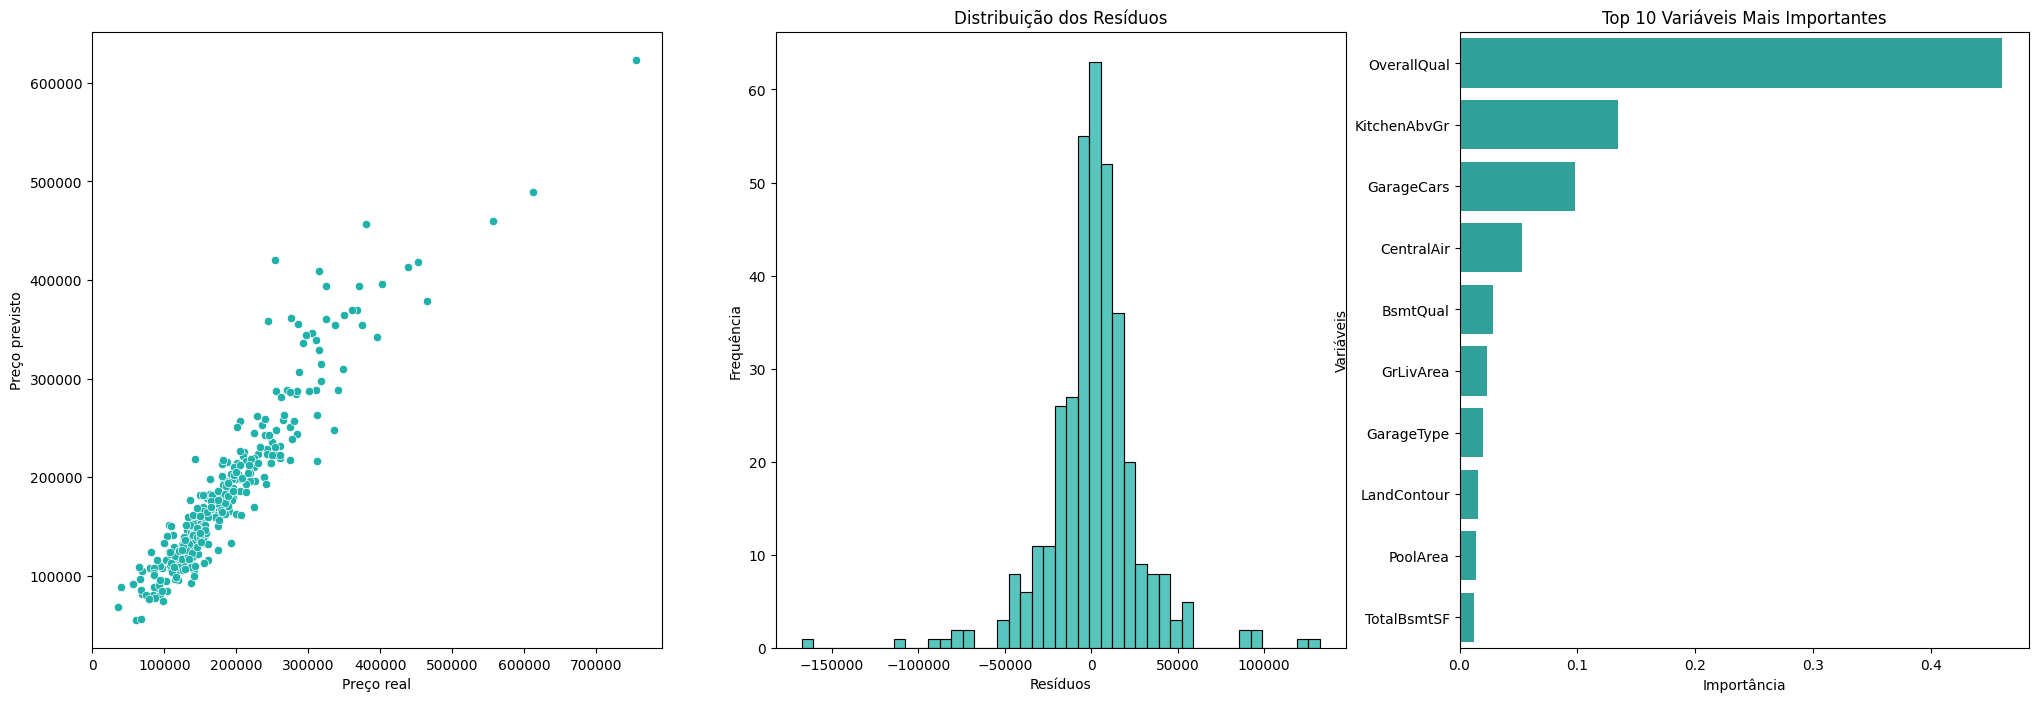

In [96]:
xgb = XGBRegressor(n_estimators=999, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE:{mse}")
print(f"R2: {r2}")
#Plotando SUBPLOTS
plt.figure(figsize=(25,8))
#Gráfico de dispersão
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
#Gráfico de resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
#Gráficos da importância das 10 variáveis mais importantes
plt.subplot(1, 3, 3)
importances = xgb.feature_importances_
variaveis = X.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importances)})
top_10 = coef_df.nlargest(10, 'Importância')
sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Top 10 Variáveis Mais Importantes")
plt.savefig("gráficos_xgboost.tiff", dpi=600)
plt.show()

# Iris Dataset

* Reducão de dimensionalidade
* Clusterização (K-Means & DBSCAN)

In [97]:
#importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [98]:
#carregando o dataset iris
iris = load_iris()
X = iris.data
y = iris.target

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [100]:
#convertendo para um DataFrame do pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
feature_names = iris.feature_names
target_names = iris.target_names

In [102]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [103]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [105]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

Explained variance by each principal component: [0.72962445 0.22850762 0.03668922 0.00517871]


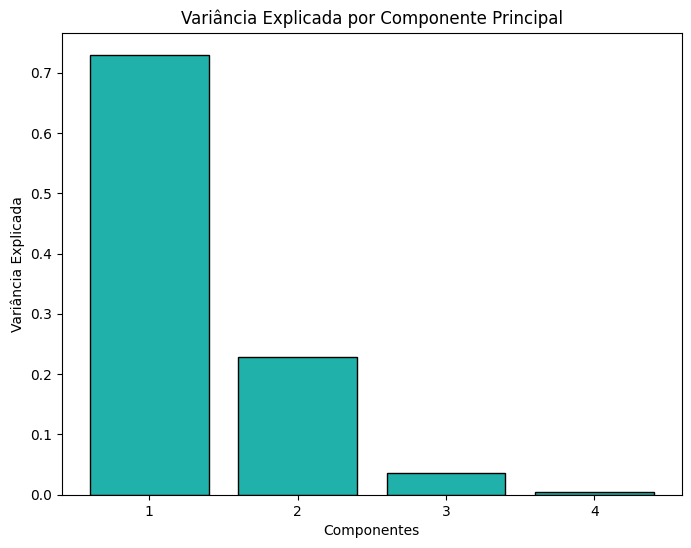

In [106]:
#variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)
components = np.arange(1, len(explained_variance) + 1)


#Plotando os dois primeiros componentes principais
plt.figure(figsize=(8,6))
plt.xlabel('Componentes')
plt.ylabel('Variância Explicada')
plt.bar(components, explained_variance, color='LightSeaGreen', edgecolor='black')
plt.xticks(components)
plt.title('Variância Explicada por Componente Principal')
plt.grid(False)
plt.savefig("PCA.png", dpi=600)
plt.show()

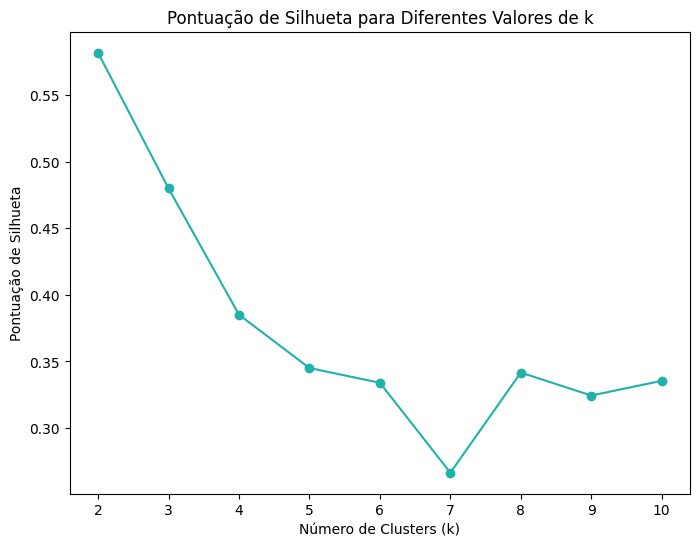

In [107]:
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    sil_scores.append(sil_score)

#plotando figura e salvando em tiff com dpi 600
plt.figure(figsize=(8,6))
plt.plot(k_range, sil_scores, marker='o', color='LightSeaGreen')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Pontuação de Silhueta')
plt.title('Pontuação de Silhueta para Diferentes Valores de k')
plt.grid(False)
plt.savefig("c:\\Users\Welton Dionisio\Desktop\\pontuação_de_silhueta.tiff", dpi=600)
plt.show()

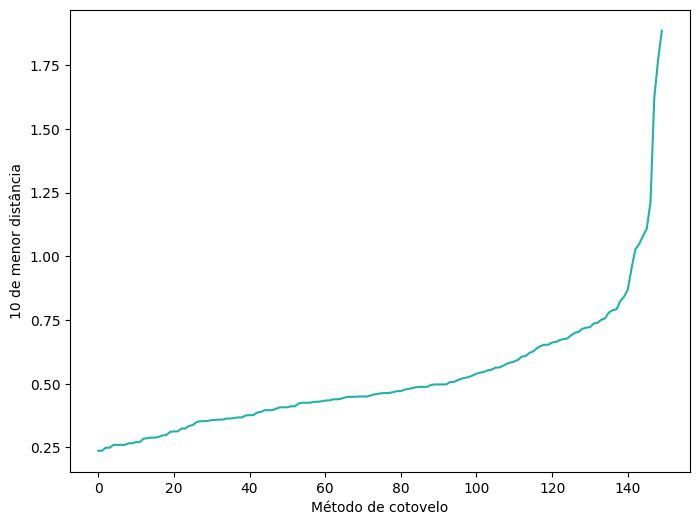

In [108]:
#Calcular distância para os 5 vizinhos mais próximos
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)

#Plotando a maior distância para cada vizinho
distances = np.sort(distances[:, -1])  # ordenar a maior distância de cada ponto
distances

#Plot para encontrar o "cotovelo"
plt.figure(figsize=(8,6))
plt.plot(distances, color='LightSeaGreen')
plt.xlabel("Método de cotovelo")
plt.ylabel(f"{k} de menor distância")
plt.grid(False)
plt.savefig("cotovelo.tiff", dpi=600)
plt.show()

Text(0.5, 1.0, 'True Labels')

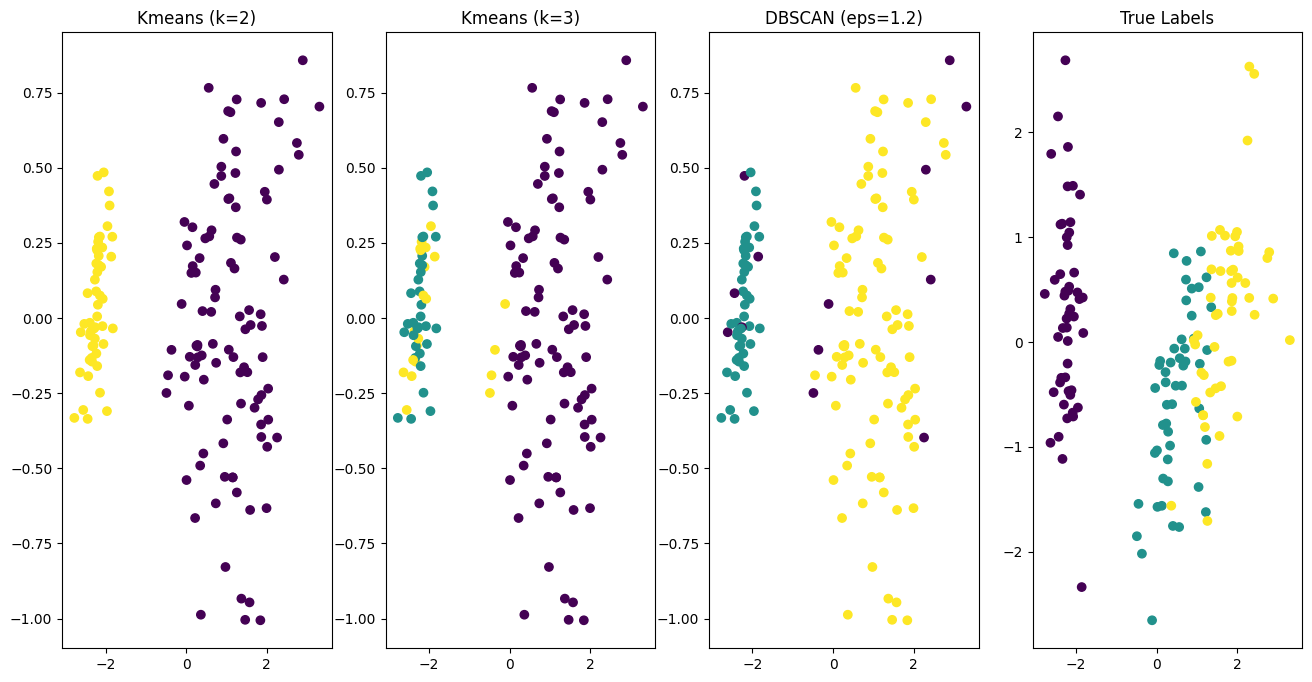

In [109]:
#Plotando agrupamentos
from matplotlib.pyplot import axes

fig, axes = plt.subplots(1, 4, figsize=(16,8))

#Kmeans com 2 e com 3 clusters
#Cluster 2
kmeansA = KMeans(n_clusters=2, random_state=42)
kmeans_labelsA = kmeansA.fit_predict(X_pca)

#Cluster 3
kmeansB = KMeans(n_clusters=3, random_state=42)
kmeans_labelsB = kmeansB.fit_predict(X_pca)

#DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=40)
dbscan_labels = dbscan.fit_predict(X_pca)

axes[0].scatter(X_pca[:,0], X_pca[:, 2], c=kmeans_labelsA, cmap='viridis')
axes[0].set_title("Kmeans (k=2)")

axes[1].scatter(X_pca[:,0], X_pca[:, 2], c=kmeans_labelsB, cmap='viridis')
axes[1].set_title("Kmeans (k=3)")

axes[2].scatter(X_pca[:,0], X_pca[:, 2], c=dbscan_labels, cmap='viridis')
axes[2].set_title("DBSCAN (eps=1.2)")

axes[3].scatter(X_pca[:,0], X_pca[:, 1], c=y, cmap='viridis')
axes[3].set_title("True Labels")

# Rede Neural Linear

In [110]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [111]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #para criar graficos
import seaborn as sns #para criar mais graficos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #o que está depois do ponto é uma subdivisão dentro da biblioteca do sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [112]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

#Set the path to the file you would like to download
file_path = "train.csv"

#Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "lespin/house-prices-dataset",
    file_path,
    #Provide any additional arguments like
    #sql_query or pandas_kwargs. See the
    #documentation for more information:
    #https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
#Também pode usar assim:
df.head() #mostra o cabeçalho do dataframe

/var/folders/68/w8w3f5fd73v0d9lzkxhv5vjh0000gn/T/ipykernel_78947/3109292666.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
#Pré processamento dos dados
#Dropar variáveis que não servem
df = df.drop(columns=['Id','Alley','MasVnrType','MiscFeature','PoolQC','FireplaceQu','Fence'])
#Id não interfere no preço da casa pq é só uma identificação
#Alley, Fence etc tem muitas variáveis ausentes, como vimos em df.info

df.info()

#contar quantas variáveis são nulas
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 74, dtype: int64

In [114]:
#usar a mediana para preencher NAs
#argumento numeric_only é para fazer essa troca só em dados numerics
df.fillna(df.median(numeric_only=True), inplace=True) #inplace é para substituir no lugar do NaN
df.fillna('None', inplace=True) #essa é para dados que está em branco/vazios

In [115]:
#criar um novo dataframe com as colunas categóricas
col_cats = df.select_dtypes(include=['object']).columns
for col in col_cats:                                #para todas as colunas categóricas
    le = LabelEncoder()                             #codificar em números
    df[col] = le.fit_transform(df[col])

#OneHotEncoder transforma uma variável categórica numa variável binária, p.e. 
#estratégias tróficas com respostas A, H, M, se transformariam em 3 colunas com variáveis binárias

In [116]:
X = df.drop(columns=['SalePrice']) #tiramos SalePrice pq é a variável resposta, x são as variáveis preditoras
y = df['SalePrice']                #agora y é a variável resposta
#X são as variáveis preditoras

#Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#test_size 25% dos dados serão usados para teste
#random_state é tipo o set.seed do R

Epoch 1/100


/Users/trash/miniconda3/envs/etetree/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22638043136.0000 - val_loss: 3272614144.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3868317952.0000 - val_loss: 3838898688.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3911048704.0000 - val_loss: 3538162944.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3779421696.0000 - val_loss: 3976784384.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3873881600.0000 - val_loss: 3838646528.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3730196736.0000 - val_loss: 3574365184.0000
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3572696576.0000 - val_loss: 3258562048.0000
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3378951680.0000 - val_loss: 3088062976.0000
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3247129088.0000 - val_loss: 2976670464.0000
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3175961856.0000 - val_lo

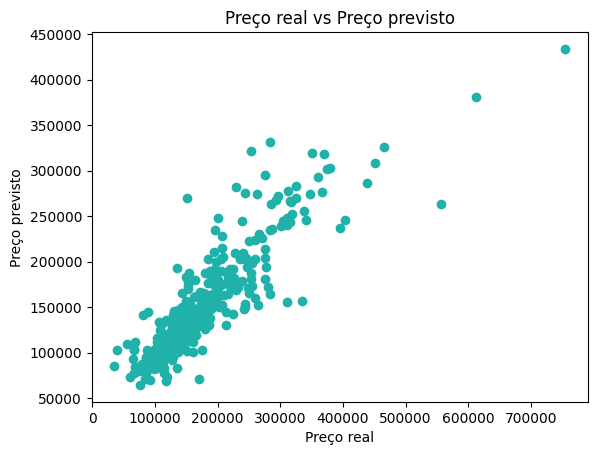

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

#Construindo o modelo
model = Sequential()
model.add(Dense(37, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(19, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear')) # camada de saída para regressão

#Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

#Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

#Fazendo previsões
y_pred = model.predict(X_test).flatten()

#Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE:{mse}")
print(f"R2: {r2}")

#Plotando os resultados
plt.scatter(y_test, y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs Preço previsto")
plt.show()

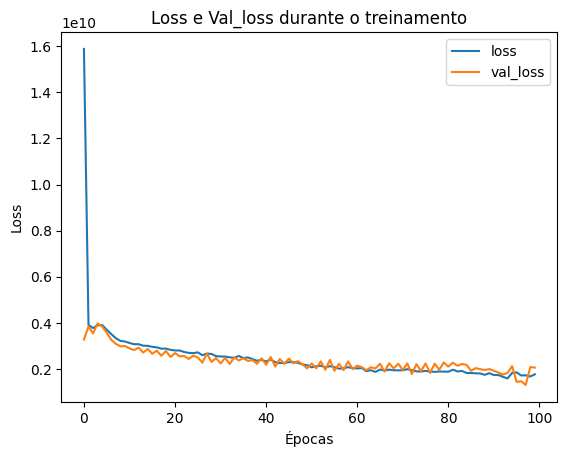

In [118]:
#plotando loss e val_loss
history = model.history.history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Loss e Val_loss durante o treinamento")
plt.legend()
plt.show()

In [119]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [120]:
import keras_tuner as kt
from tensorflow.keras.layers import Dropout 
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=256, step=16),
                        activation='relu'))
        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1))) # valores adequados para elimar overfitting
    model.add(Dense(1, activation='linear')) 
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')),
                  loss='mean_squared_error')
    return model

Reloading Tuner from my_dir/house_price_tuning/tuner0.json
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/trash/miniconda3/envs/etetree/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/trash/miniconda3/envs/etetree/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


MAE: 21696.03515625
MSE:1237998208.0
R2: 0.8232771158218384


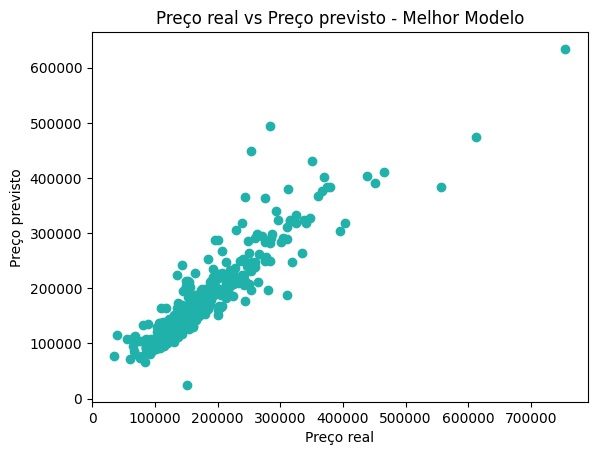

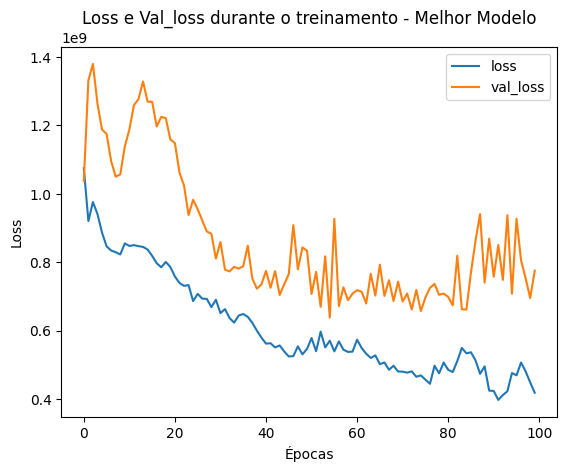

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 448)            │        33,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 176)            │        79,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,557 (1.57 MB)

 Trainable params: 137,185 (535.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,372 (1.05 MB)

Dropout rate: 0.0


In [122]:
turner = kt.RandomSearch(build_model,
                         objective='val_loss',
                         max_trials=10,
                         executions_per_trial=1,
                         directory='my_dir',
                         project_name='house_price_tuning')         
#procura o melhor modelo
turner.search(X_train, y_train, epochs=100, validation_split=0.25) 
#obter o melhor modelo
best_model = turner.get_best_models(num_models=1)[0] #[0] para pegar o primeiro modelo 
#fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test).flatten()
#Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")                    
print(f"MSE:{mse}")
print(f"R2: {r2}")
#Plotando os resultados do melhor modelo        
plt.scatter(y_test, y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs Preço previsto - Melhor Modelo")
plt.show()

#plotando loss e val_loss do melhor modelo
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0).history 
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Loss e Val_loss durante o treinamento - Melhor Modelo")
plt.legend()
plt.show()

#salvando o modelo treinado
best_model.save("house_price_model.h5")

#exibir a arquitetura do modelo
best_model.summary()

#exibir o dropout usado no modelo
for layer in best_model.layers:
    if isinstance(layer, Dropout):
        print(f"Dropout rate: {layer.rate}")    
        